In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
root = '../../../datasets/MultiviewX/Image_subsets/C2/0000.png'
root1 = '../../../datasets/MultiviewX/Image_subsets/C6/0000.png'

img = cv2.imread(root)
img1 = cv2.imread(root1)

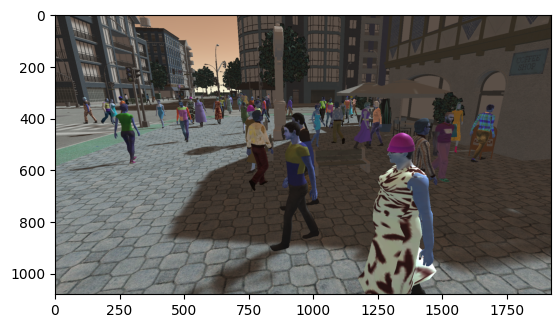

In [3]:
plt.imshow(img1)

True

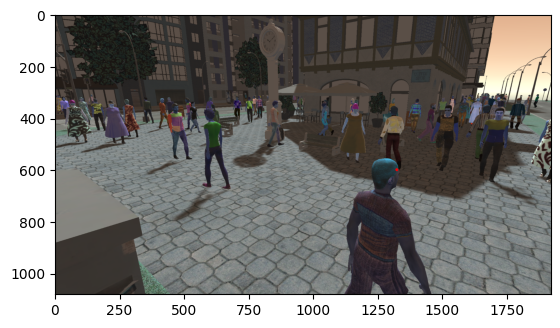

In [15]:
circle_0 = (1320, 600)
# img_with_rec = cv2.rectangle(img.copy(),sp_c2, ep_c2, color = (255, 0, 0),thickness = 3)
img_with_point = cv2.circle(img.copy(), circle_0, radius = 3, color = (255, 0, 0),thickness = 3)
plt.imshow(img_with_point)
cv2.imwrite('op1.png',img_with_point)

True

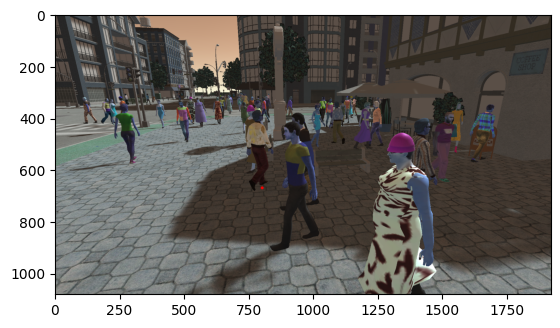

In [16]:
circle_1 = (800, 670)
# img_with_rec = cv2.rectangle(img.copy(),sp_c2, ep_c2, color = (255, 0, 0),thickness = 3)
img1_with_point = cv2.circle(img1.copy(), circle_1, radius = 3, color = (255, 0, 0),thickness = 3)
plt.imshow(img1_with_point)
cv2.imwrite('op2.png',img1_with_point)


In [9]:
normalized_coord = np.linalg.inv(c2_in) @ np.array([sp_c2[0], sp_c2[1], 1])
x, y, _ = normalized_coord

In [12]:
camera1_coord = np.array([x, y, 1])
world_coord = np.linalg.inv(c2_R) @ (camera1_coord - c2_T)

In [15]:
# 将世界坐标转换到相机2的相机坐标系
camera2_coord = c3_R @ world_coord + c3_T

In [21]:
# 相机一的内外参矩阵
camera_matrix1 = np.array([[9.0000025264813451e+02, 0., 9.5999987072918532e+02], 
                           [0., 9.0000033973087704e+02, 5.3999987713321059e+02],
                            [0., 0., 1.]])
dist_coeffs1 = np.array([-1.6344021960607997e-06, 2.7294202753125671e-06,
                         -2.5739803459849870e-08, 2.9316484349514022e-08,
                         -1.2018229440933732e-06])
R1, _ = cv2.Rodrigues(np.array([-1.2615197302646406e+00,
                                4.1726883239727519e-01,
                                5.4379507535231220e-01]))
T1 = np.array([-3.0791218013940238e+00, -2.9619545805836935e+00, 2.5540128107375155e+00]).reshape((3,1))

# 相机二的内外参矩阵
camera_matrix2 = np.array([[8.9999970875868166e+02, 0., 9.6000053432249376e+02],
                           [0., 9.0000000086462489e+02, 5.4000000259908370e+02],
                           [0., 0., 1.]])
dist_coeffs2 = np.array([9.8605179896339836e-07, -2.0762087876771221e-08,
                         8.7883987883466879e-08, 2.2214242415403070e-07,
                         -2.7295175757694746e-06])
R2, _ = cv2.Rodrigues(np.array([-1.0783297242911292e+00,
                                9.0301500000937185e-01,
                                1.1768320169853719e+00]))
T2 = np.array([7.4868089710420751e+00, -2.7282981807580566e+00, 1.6820040185741674e+00]).reshape((3,1))

# # 将像素坐标（x1,y1)转换为相机一的相机坐标系中的归一化坐标
point_normalized_camera1 = cv2.undistortPoints(np.array([[circle_0[0]-1920/2, circle_0[1]-1080/2]]).astype(np.float32), camera_matrix1, dist_coeffs1)

# 使用相机一的外参矩阵将相机坐标系中的归一化坐标转换为世界坐标系中的三维坐标
point_world = cv2.convertPointsToHomogeneous(point_normalized_camera1)
point_world = R1.dot(point_world.reshape(-1, 1)) + T1
# point_world = np.dot(R1, point_world) + T1
print(point_world.shape)

# 使用相机二的外参矩阵将世界坐标系中的三维坐标转换为相机二的相机坐标系中的三维坐标
point_camera2 = np.linalg.inv(R2).dot(point_world - T2)

# 使用相机二的内参矩阵和畸变系数将相机坐标系中的三维坐标投影到相机二的图像平面上
point_pixel_camera2, _ = cv2.projectPoints(point_camera2.T, R2, T2, camera_matrix2, dist_coeffs2)

print("相机二中相对位置:", point_pixel_camera2[0][0])

(1, 1, 3)


ValueError: shapes (3,3) and (1,1,3) not aligned: 3 (dim 1) != 1 (dim 1)

In [ ]:
# 已知的相机参数
camera_matrix1 = np.array([[9.0000025264813451e+02, 0., 9.5999987072918532e+02], 
                           [0., 9.0000033973087704e+02, 5.3999987713321059e+02],
                            [0., 0., 1.]])  # 内参矩阵
dist_coeffs1 = np.array([-1.6344021960607997e-06, 2.7294202753125671e-06,
                         -2.5739803459849870e-08, 2.9316484349514022e-08,
                         -1.2018229440933732e-06])  # 畸变系数
rvec1 = np.array([-1.2615197302646406e+00,
                                4.1726883239727519e-01,
                                5.4379507535231220e-01])  # 旋转向量
tvec1 = np.array([-3.0791218013940238e+00, -2.9619545805836935e+00, 2.5540128107375155e+00])  # 平移向量

camera_matrix2 = np.array([[8.9999970875868166e+02, 0., 9.6000053432249376e+02],
                           [0., 9.0000000086462489e+02, 5.4000000259908370e+02],
                           [0., 0., 1.]])  # 内参矩阵
dist_coeffs2 = np.array([9.8605179896339836e-07, -2.0762087876771221e-08,
                         8.7883987883466879e-08, 2.2214242415403070e-07,
                         -2.7295175757694746e-06])  # 畸变系数
rvec2 = np.array([-1.0783297242911292e+00,
                                9.0301500000937185e-01,
                                1.1768320169853719e+00])  # 旋转向量
tvec2 = np.array([7.4868089710420751e+00, -2.7282981807580566e+00, 1.6820040185741674e+00])  # 平移向量

# 原始图像坐标
point_image1 = np.array([[circle_0[0], circle_0[1]]])
# point_image2 = np.array([[x2, y2]])

# 将图像坐标转换为相机归一化坐标
point_normalized_camera1 = cv2.undistortPoints(point_image1, camera_matrix1, dist_coeffs1)
# point_normalized_camera2 = cv2.undistortPoints(point_image2, camera_matrix2, dist_coeffs2)

# 将相机归一化坐标转换为世界坐标
point_world1 = cv2.solvePnP(object_points, point_normalized_camera1, camera_matrix1, dist_coeffs1)[1]
# point_world2 = cv2.solvePnP(object_points, point_normalized_camera2, camera_matrix2, dist_coeffs2)[1]

# 将世界坐标转换为相机坐标
point_camera1 = cv2.projectPoints(point_world1, rvec1, tvec1, camera_matrix1, dist_coeffs1)[0]
# point_camera2 = cv2.projectPoints(point_world2, rvec2, tvec2, camera_matrix2, dist_coeffs2)[0]

# 将相机坐标映射到另一个相机的图像坐标
point_image_mapped2 = cv2.projectPoints(point_camera1, rvec2, tvec2, camera_matrix2, dist_coeffs2)[0]

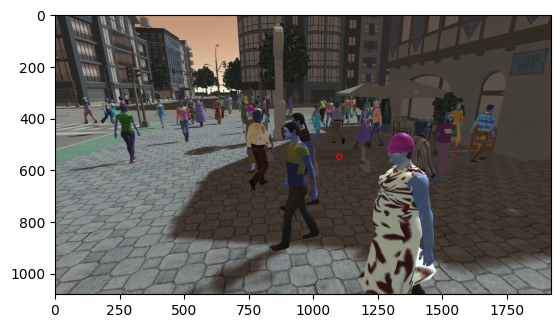

In [20]:
img1_with_point = cv2.circle(img1.copy(), (int(1920/2+point_pixel_camera2[0][0][0]), int(1080/2-point_pixel_camera2[0][0][1])), radius = 10, color = (255, 0, 0),thickness = 3)
plt.imshow(img1_with_point)

In [16]:
c3_in = [
    [9.0000117557120905e+02, 0., 9.5999984579268857e+02],
    [0., 9.0000060406968146e+02, 5.3999949106299698e+02],
    [0., 0., 1.]
]

# 将相机坐标投影到相机2的图像平面
image2_coord = c3_in @ camera2_coord
u2, v2 = image2_coord[:2] / image2_coord[2]

print(f"人物在相机2图像中的位置: ({u2}, {v2})")

人物在相机2图像中的位置: ([3039.39901156 3300.11468144 4889.60730879], [ 430.29124764  352.54338967 -121.45821942])


In [45]:
# test
# 相机一的内外参矩阵
camera_matrix1 = np.array([[9.0000025264813451e+02, 0., 9.5999987072918532e+02],
                           [0., 9.0000033973087704e+02, 5.3999987713321059e+02],
                           [0., 0., 1.]])
dist_coeffs1 = np.array([-1.6344021960607997e-06, 2.7294202753125671e-06,
                         -2.5739803459849870e-08, 2.9316484349514022e-08,
                         -1.2018229440933732e-06])
R1, _ = cv2.Rodrigues(np.array([-1.2615197302646406e+00, 4.1726883239727519e-01, 5.4379507535231220e-01]))
# print(R1.shape)
T1 = np.array([-3.0791218013940238e+00, -2.9619545805836935e+00, 2.5540128107375155e+00]).reshape((3,1))
# T2 = np.array([-1.6184206742713787e+01, -7.7734282738005034e-01, -5.5990849840723618e+00]).reshape((3,1))

# 相机二的内外参矩阵
camera_matrix2 = np.array([[9.0000117557120905e+02, 0., 9.5999984579268857e+02],
                           [0., 9.0000060406968146e+02, 5.3999949106299698e+02],
                           [0., 0., 1.]])
dist_coeffs2 = np.array([-6.4585194920472315e-06, 8.8393208189705339e-06,
                         -1.0350489830855019e-07, 3.6294561387866681e-08,
                         -2.4781299928125299e-06])
R2, _ = cv2.Rodrigues(np.array([-1.2938683868683263e+00, -2.3630277810625011e-01, -3.0795546016451214e-01]))
T2 = np.array([-1.6184206742713787e+01, -7.7734282738005034e-01, -5.5990849840723618e+00]).reshape((3,1))

# 将像素坐标（x1,y1)转换为相机一的相机坐标系中的归一化坐标
point_normalized_camera1 = cv2.undistortPoints(np.array([[1468-1920/2, 371-1080/2]]).astype(np.float32), camera_matrix1, dist_coeffs1)

# 使用相机一的外参矩阵将相机坐标系中的归一化坐标转换为世界坐标系中的三维坐标
point_world = cv2.convertPointsToHomogeneous(point_normalized_camera1)
point_world = R1.dot(point_world.reshape(-1, 1)) + T1

# 使用相机二的外参矩阵将世界坐标系中的三维坐标转换为相机二的相机坐标系中的三维坐标
point_camera2 = R2.T.dot(point_world - T2)

# 使用相机二的内参矩阵和畸变系数将相机坐标系中的三维坐标投影到相机二的图像平面上
point_pixel_camera2, _ = cv2.projectPoints(point_camera2.T, R2, T2, camera_matrix2, dist_coeffs2)

print("相机二中的像素坐标:", point_pixel_camera2[0][0])

相机二中的像素坐标: [229.77487903  -2.29012566]


In [31]:
print(img.shape)

(1080, 1920, 3)


In [35]:
img2 = cv2.imread(root2)
print(img2.shape)

(1080, 1920, 3)


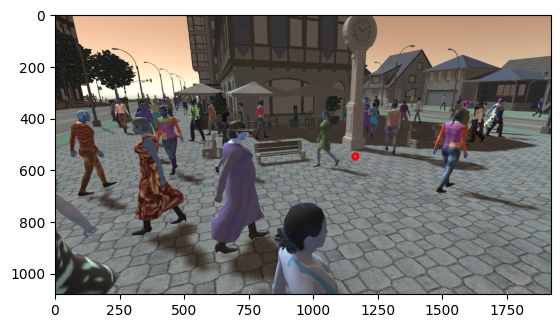

In [58]:
img1_with_point = cv2.circle(img1.copy(),(int(1920/2+200.1319), int(1080/2+9.489)),radius = 10, color = (255,0,0), thickness = 10)
plt.imshow(img1_with_point)

In [57]:
# 相机一的内外参矩阵
camera_matrix1 = np.array([[9.0000025264813451e+02, 0., 9.5999987072918532e+02],
                           [0., 9.0000033973087704e+02, 5.3999987713321059e+02],
                           [0., 0., 1.]])
dist_coeffs1 = np.array([-1.6344021960607997e-06, 2.7294202753125671e-06,
                         -2.5739803459849870e-08, 2.9316484349514022e-08,
                         -1.2018229440933732e-06])
R1, _ = cv2.Rodrigues(np.array([-1.2615197302646406e+00, 4.1726883239727519e-01, 5.4379507535231220e-01]))
# print(R1.shape)
T1 = np.array([-3.0791218013940238e+00, -2.9619545805836935e+00, 2.5540128107375155e+00]).reshape((3,1))
# T2 = np.array([-1.6184206742713787e+01, -7.7734282738005034e-01, -5.5990849840723618e+00]).reshape((3,1))

# 相机二的内外参矩阵
camera_matrix2 = np.array([[9.0000117557120905e+02, 0., 9.5999984579268857e+02],
                           [0., 9.0000060406968146e+02, 5.3999949106299698e+02],
                           [0., 0., 1.]])
dist_coeffs2 = np.array([-6.4585194920472315e-06, 8.8393208189705339e-06,
                         -1.0350489830855019e-07, 3.6294561387866681e-08,
                         -2.4781299928125299e-06])
R2, _ = cv2.Rodrigues(np.array([-1.2938683868683263e+00, -2.3630277810625011e-01, -3.0795546016451214e-01]))
T2 = np.array([-1.6184206742713787e+01, -7.7734282738005034e-01, -5.5990849840723618e+00]).reshape((3,1))

# 将像素坐标（x1,y1)转换为相机一的相机坐标系中的归一化坐标
point_normalized_camera1 = cv2.undistortPoints(np.array([[1270-1920/2, 338-1080/2]]).astype(np.float32), camera_matrix1, dist_coeffs1)

# 使用相机一的外参矩阵将相机坐标系中的归一化坐标转换为世界坐标系中的三维坐标
point_world = cv2.convertPointsToHomogeneous(point_normalized_camera1)
point_world = R1.dot(point_world.reshape(-1, 1)) + T1

# 使用相机二的外参矩阵将世界坐标系中的三维坐标转换为相机二的相机坐标系中的三维坐标
point_camera2 = R2.T.dot(point_world - T2)

# 使用相机二的内参矩阵和畸变系数将相机坐标系中的三维坐标投影到相机二的图像平面上
point_pixel_camera2, _ = cv2.projectPoints(point_camera2.T, R2, T2, camera_matrix2, dist_coeffs2)

print("相机二中的像素坐标:", point_pixel_camera2[0][0])

相机二中的像素坐标: [143.39458068  54.30037379]


In [59]:
R1, _ = cv2.Rodrigues(np.array([-1.2615197302646406e+00, 4.1726883239727519e-01, 5.4379507535231220e-01]))
R1

array([[ 8.02765477e-01, -5.96294885e-01,  5.06087206e-08],
       [ 1.54332261e-01,  2.07770792e-01,  9.65925904e-01],
       [-5.75976686e-01, -7.75411960e-01,  2.58818757e-01]])